### 1. mglearn 패키지 실행방법 2가지 (디렉토리 위치 연관하여 설명하시오.)
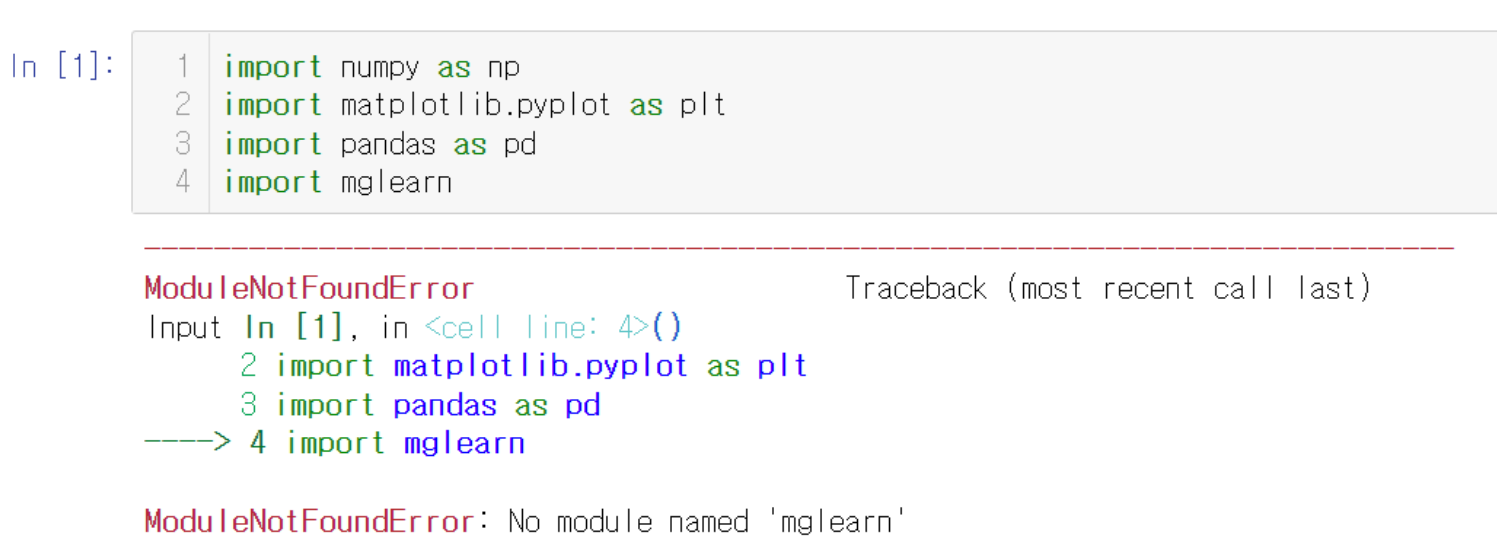

### 2. 다음 그래프를 구현하기 위한 코드를 각각 작성하시오. (임포트 포함)

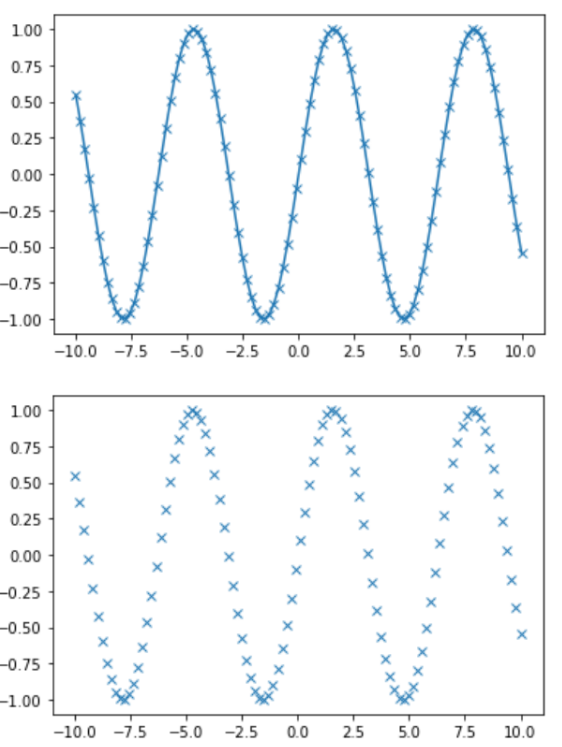

### 3.scikit-learn에서 제공되는 데이터 셋을 다루는 코드 관련 문제
1. scikit-learn에서 제공하는 데이터 셋의 자료형은 무엇이며 어떤 구조로 이루어져있는가?
1. 어떤 키들이 있는지 확인하는 메서드는?
1. 해당 데이터 셋에 대한 설명을 확인하는 메서드는?
1. 해당 데이터 셋이 해당문제가 분류(classification)에 해당될 때 target의 이름이 뭐가 있는지 확인하는 메서드는?
1. 특성이 어떤 것이 있는지 확인하는 메서드는?
1. 열의 데이터를 확인하는 메서드는?
1. target 데이터를 확인하는 메서드는?

### 4.kNN을 이용한 붓꽃 품종 분류 코드다. 틀린 부분을 수정하시오 (2개)

In [3]:
import pandas as pd 
import numpy as np
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris_dataset = load_iris()

#
X_train, X_test, y_train, y_test = \
train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

#
knn = KNeighborsClassifier(n_neighbors= 1)

#
knn.fit(X_train, y_train)

#
print("테스트 세트의 정확도 {:.2f}".format(knn.score(X_train, y_train)))

#
X_new = np.array([5,2.9,1,0.2])
print("X_new.shape:", X_new.shape)

prediction = knn.predict(X_new)
print("예측:", prediction) 
print("예측한 타깃의 이름:",iris_dataset['target_names'][prediction]) 

테스트 세트의 정확도 1.00
X_new.shape: (4,)


ValueError: Expected 2D array, got 1D array instead:
array=[5.  2.9 1.  0.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 5.지도학습에 대해 설명하고 분류와 회귀의 공통점과 차이점을 설명하시오.

### 6. 일반화에 대해 설명하고 과대적합, 과소적합을 이웃수와 연관지어 설명하시오.

### 7. 각 물음에 답하시오 (총 4 문제)


In [ ]:

import pandas as pd 
import numpy as np
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 

#1. 전체 데이터의 양성과 악성의 비율을 파악하는 코드를 작성하시오. 

X_train, X_test, y_train, y_test = train_test_split(\
 cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

#2. stratify = cancer.target 인자의 의미와 효과는? 

#3. random_state = (어떤 수)  인자 의미


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train) 
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#4. k=1에서 훈련정확도가 1인 이유를 설명하시오. 

### 8. 각 물음에 답하시오. (4개 질문)

In [4]:
import pandas as pd 
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X , y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#1. fig, axes에 할당되는 값에 대해 설명하시오.
fig, axes = plt.subplots(1,3,figsize=(15,4))

#2. reshape(-1,1)의 의미는?, 이것은 언제 필요한가?
line = np.linspace(-3,3,1000).reshape(-1,1)

#3. for 구문 의미 
for n_neighbors, ax in zip([1,3,9],axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8) 
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8) 
    
    ax.set_title("{}이웃의 훈련 스코어 : {:.2f} 테스트 스코어: {:.2f}".format(\
                            n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
    axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc = 'best')

#4. 그래프 해석 

NameError: name 'plt' is not defined